<a href="https://colab.research.google.com/github/ChapelFob80930/ANN/blob/main/ANN_Using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
## import basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## Divide the dataset into independent and dependent features

X = dataset.iloc[:,3:13]
Y = dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
Y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
## Feature Engineering

geography = pd.get_dummies(X['Geography'], dtype = int, drop_first = True)
gender = pd.get_dummies(X['Gender'], dtype = int, drop_first = True)


In [ ]:
## Concatenate variables with dataframe

X = X.drop(['Geography', 'Gender'],axis = 1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X = pd.concat([X, geography, gender], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0 )

In [ ]:
# feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
# Part 2 creating the ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
### Initializing the ANN

classifier = Sequential()

In [ ]:
## Adding the input layer

classifier.add(Dense(units = 11, activation = 'relu'))

In [ ]:
## Adding the first hidden layer

classifier.add(Dense(units = 7, activation='relu'))
classifier.add(Dropout(0.2))

In [ ]:
## Adding the second hidden layer

classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dropout(0.3))

In [ ]:
## Adding the output layer

classifier.add(Dense(1,activation = 'sigmoid'))

In [ ]:
## configures the model for training

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# By default adam uses a learning rate of 0.01, to add your own learning rate
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)
#and then use this in the compile method in place of'adam' can do similar thing for all optimizers

In [ ]:
## Early Stopping

import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history = classifier.fit(X_train, Y_train, validation_split = 0.33, batch_size = 10, epochs = 1000, callbacks = early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6886 - loss: 0.6348 - val_accuracy: 0.7955 - val_loss: 0.4800
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8000 - loss: 0.5060 - val_accuracy: 0.8020 - val_loss: 0.4464
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8004 - loss: 0.4850 - val_accuracy: 0.8054 - val_loss: 0.4392
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8052 - loss: 0.4609 - val_accuracy: 0.8080 - val_loss: 0.4328
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8099 - loss: 0.4542 - val_accuracy: 0.8114 - val_loss: 0.4273
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8181 - loss: 0.4468 - val_accuracy: 0.8111 - val_loss: 0.4224
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8158 - loss: 0.4452 - val_accuracy: 0.8156 - val_loss: 0.4194
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8076 - loss: 0.4472 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

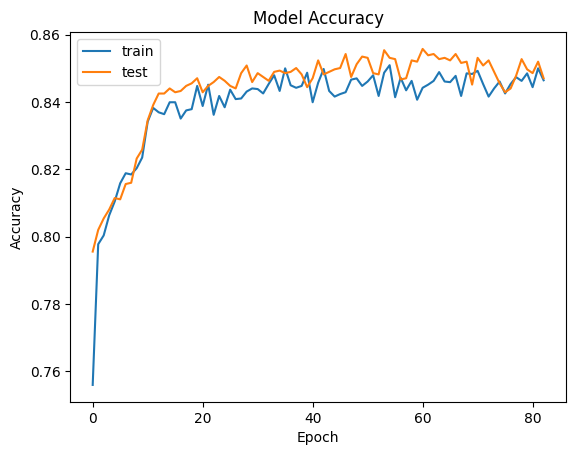

In [ ]:
#summary for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'] , loc='upper left')
plt.show()

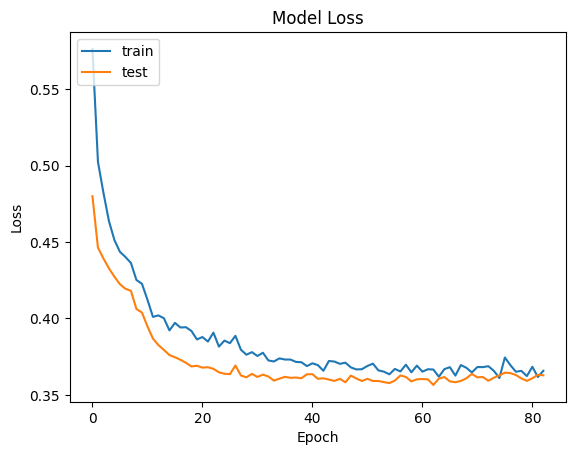

In [ ]:
#summary history for accuracy

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'] , loc='upper left')
plt.show()

In [ ]:
## Part 3 making predictions and evaluating the model

y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
## making the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)

cm

array([[1522,   73],
       [ 203,  202]])

In [ ]:
## calculate the accuracy

from sklearn.metrics import accuracy_score

score = accuracy_score(Y_pred, Y_test)

In [ ]:
score

0.862

In [ ]:
## get the weights

classifier.get_weights()

[array([[-0.00531736, -0.34102386,  0.02058984,  0.091242  , -0.04436737,
         -0.05553309, -0.20342769,  0.3094015 ,  0.08716413, -0.09966773,
         -0.14474268],
        [-0.52052855,  0.09541498,  0.08061439, -0.49954066, -0.08467179,
          0.08868603, -0.86002344, -0.56872755, -0.10027331,  0.6676388 ,
         -0.80802226],
        [ 0.07622077, -0.074029  , -0.09906067, -0.10241195,  0.2622658 ,
         -0.11724999, -0.23891875,  0.02378704, -0.1739485 , -0.07720588,
         -0.14050831],
        [ 0.17492382,  0.1493691 , -0.01438696,  0.05537455, -0.00907631,
         -0.45121467, -0.20992231,  0.12375706,  1.1342207 , -0.04038844,
          0.17589718],
        [ 0.25612304,  0.47496533,  1.227032  ,  0.0825969 ,  0.18380937,
         -1.189744  ,  0.24969152, -0.09929963,  1.1752894 ,  0.01298623,
          0.75615776],
        [-0.24724495,  0.22881286, -0.07090288,  0.21176511,  0.32622594,
         -0.13867612,  0.02944231,  0.08360271, -0.04163844,  0.0252328